# 1.)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [2]:
faces  = fetch_lfw_people(min_faces_per_person=60)
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [3]:
len(faces["target"]), faces["data"].shape

(1348, (1348, 2914))

In [4]:
faces["images"].shape

(1348, 62, 47)

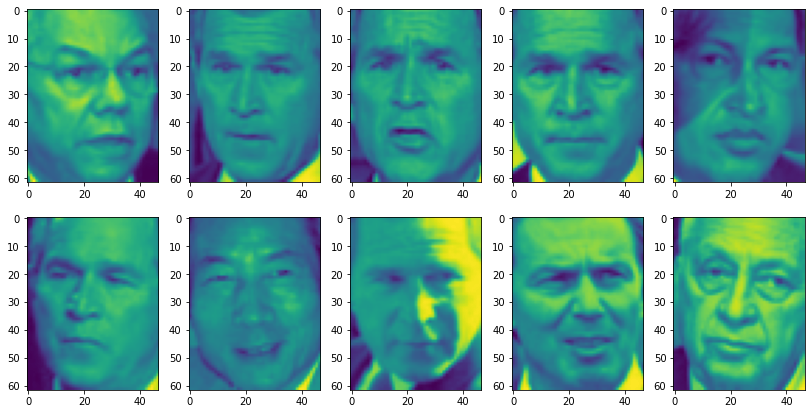

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=[14, 7])
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(faces["images"][i * 5 + j])
plt.show()

In [6]:
from sklearn.decomposition import PCA

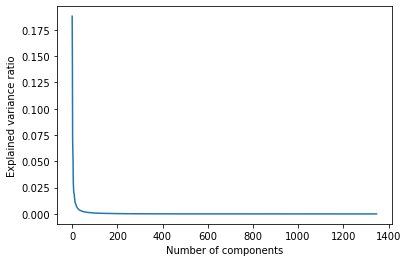

In [7]:
pca = PCA()
X_pca = pca.fit(faces["data"])
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.show()

In [8]:
idx = X_pca.explained_variance_ratio_.size 
num_components = None
for i in range(idx):
    curr_sum = pca.explained_variance_ratio_[:i].sum()
    print("Explained variance ratio: " + str(curr_sum) + " num components: " + str(i))
    if (curr_sum >= 0.99):
        num_components = i
        break
        
num_components
    

Explained variance ratio: 0.0 num components: 0
Explained variance ratio: 0.1878271 num components: 1
Explained variance ratio: 0.33333045 num components: 2
Explained variance ratio: 0.40433162 num components: 3
Explained variance ratio: 0.46462166 num components: 4
Explained variance ratio: 0.5150232 num components: 5
Explained variance ratio: 0.5443854 num components: 6
Explained variance ratio: 0.5690782 num components: 7
Explained variance ratio: 0.58955604 num components: 8
Explained variance ratio: 0.60924226 num components: 9
Explained variance ratio: 0.6281566 num components: 10
Explained variance ratio: 0.643769 num components: 11
Explained variance ratio: 0.6584683 num components: 12
Explained variance ratio: 0.6706131 num components: 13
Explained variance ratio: 0.6815707 num components: 14
Explained variance ratio: 0.6919989 num components: 15
Explained variance ratio: 0.70171875 num components: 16
Explained variance ratio: 0.71078706 num components: 17
Explained variance r

413

# 2.)

In [9]:
first_components = X_pca.components_[:50]
first_components, first_components.shape

(array([[-0.00579762, -0.00595355, -0.00615761, ..., -0.01000107,
         -0.00901088, -0.00813913],
        [ 0.01708296,  0.01623669,  0.01622009, ..., -0.03474266,
         -0.03416988, -0.03298328],
        [-0.01833719, -0.0167019 , -0.0155707 , ..., -0.03540277,
         -0.03147685, -0.0292977 ],
        ...,
        [ 0.0007987 ,  0.00463469,  0.00737235, ...,  0.02380528,
         -0.01456491, -0.04374183],
        [ 0.03022917,  0.03357554,  0.03967363, ..., -0.0112147 ,
         -0.03686647, -0.05330088],
        [-0.01870807, -0.01993614, -0.02075642, ...,  0.02709007,
          0.01271761,  0.0106918 ]], dtype=float32),
 (50, 2914))

In [10]:
first_components_reshaped = first_components.reshape((50, 62, 47))
first_components_reshaped.shape

(50, 62, 47)

In [ ]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=[20,14])
for i in range(5):
    for j in range(10):
        ax[i][j].imshow(first_components_reshaped[i * 5 + j])
plt.show()

# 3.)

In [12]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [13]:
def calc_reconstruction_errors(num_components):
    local_pca = PCA(num_components)
    data_trf = local_pca.fit_transform(faces["data"])
    data_retrf = local_pca.inverse_transform(data_trf)
    error = rmse(data_retrf, faces["data"])
    return (data_retrf, error)
    

In [14]:
n_components = [10, 20, 30, 50, 100, 150, 400]
errors = [calc_reconstruction_errors(n_component) for n_component in n_components]
len(errors)

7

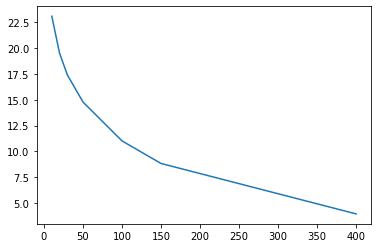

In [15]:
rmses = [error[1] for error in errors]
plt.plot(n_components, rmses)
plt.show()

# 4.)

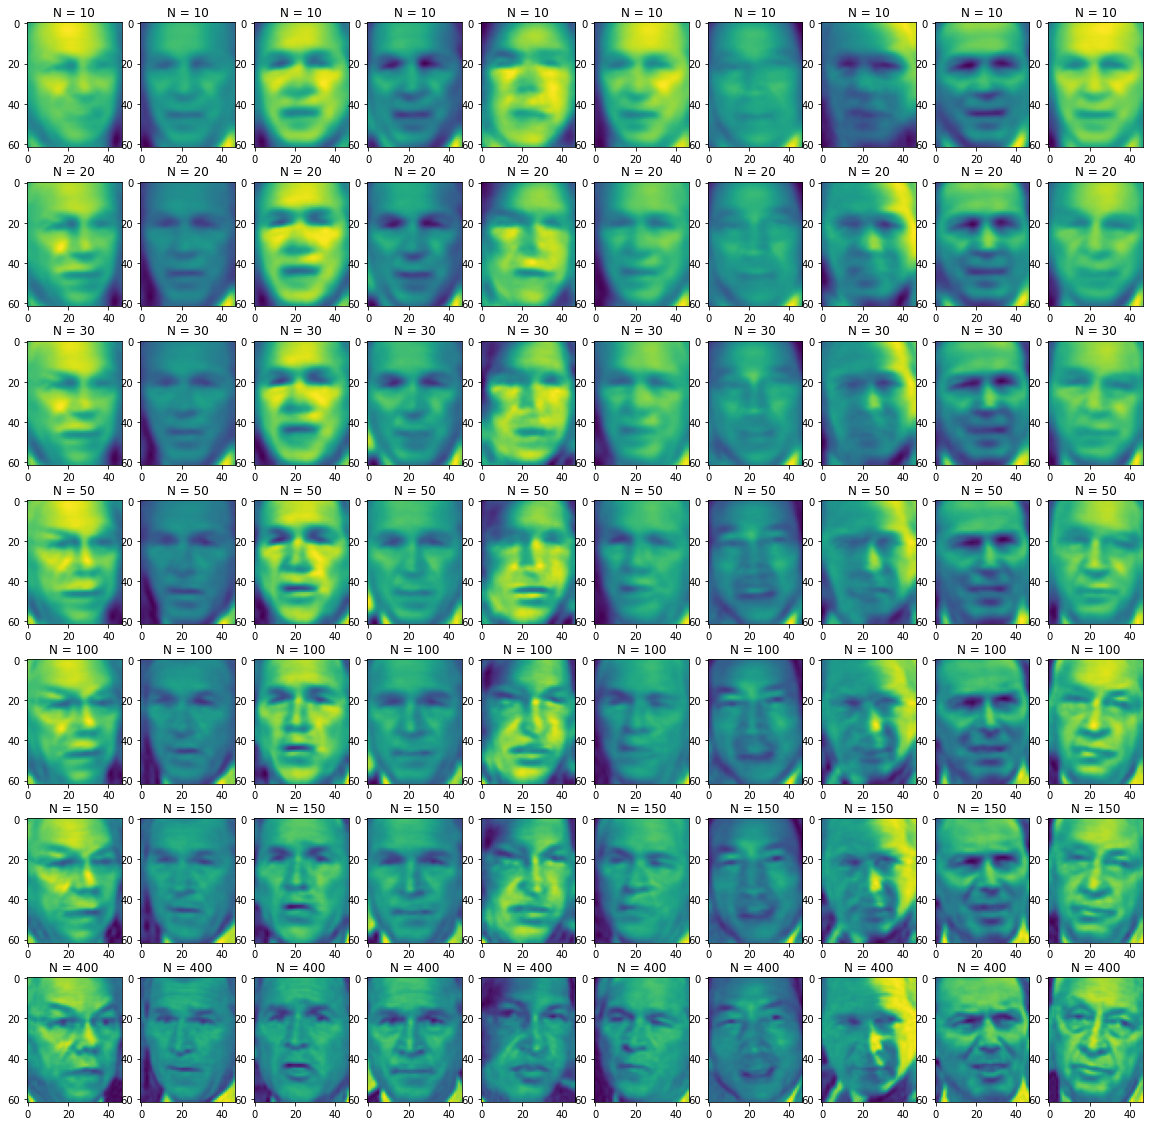

In [16]:
reconstructions = [error[0] for error in errors]
fig, ax = plt.subplots(nrows=7, ncols=10, figsize=[20,20])

row = 0
col = 0
for reconstruction in reconstructions:
    recon_reshaped = reconstruction.reshape(1348, 62, 47)
    pictures = recon_reshaped[:10]
    for picture in pictures:
        ax[row][col].imshow(picture)
        ax[row][col].set_title("N = " + str(n_components[row]))
        col += 1
    row += 1
    col = 0
        
plt.show()